
**Análisis de intervalos**

En el notebook anterior, entre otras cosas, hicieron su módulo para desarrollar la aritmética de intervalos, incluyendo además algunas pruebas. El módulo permite hacer las operaciones básicas de intervalos, incluyendo las potencias. Además, vimos que la manera en que uno opera los intervalos influye en la respuesta. Importante es notar que lo que se ha hecho hasta el momento sirve para funciones racionales de la forma $f(x)=p(x)/q(x)$, donde $p(x)$ y $q(x)$ son polinomios en $x$.

El propósito de este notebook es extender lo ya hecho a las funciones estándares, que son $exp(x)$ $log(x)$, las funciones trigonométricas ($sin(x)$, $cos(x)$, $tan(x)$, etc.), sus inversas ($arcsin(x)$, etc), y las hiperbólicas ($sinh(x)$, etc). Combinaciones utilizando las operaciones aritméticas que involucran las funciones estándares (y los polinomios) es lo que constituye a las funciones elementales.
Extensión de funciones a intervalos

Si $f(x)$ es una función elemental monótona, su extensión a intervalos intuitivamente es: $F([a,b])=[F(a),F(b)]$.

Para las funciones monótonas estándares, el intervalo $F([a,b])$ que define la extensión de $f(x)$ al intervalo $[a,b]$ es lo que se llama la extensión natural a intervalos, ya que corresponde a una cota estrecha del rango de $f(x)$ para $x∈[a,b]$, que denotaremos $R(f;[a,b])$.



**Ampliacion de funciones con intervalos**

In [2]:
type Intervalo
    inf::BigFloat
    sup::BigFloat

    function Intervalo(x,y)
        #En esta parte simplemente nos aseguramos que las entradas sean intervalos
        #if x>=y
            #error("Las entradas no corresponden a un intervalo")
        #end
        #Esta es la parte fina del codigo donde vamos a redondear
        xs=string(x)
        ys=string(y)
        set_rounding(BigFloat,RoundDown)
        x=BigFloat(float(xs))
        set_rounding(BigFloat,RoundUp)
        y=BigFloat(float(ys))
        new(x,y)
    end
end

In [3]:
#Suma
function +(A::Intervalo,B::Intervalo)
    C=Intervalo(0.0,0.1)
    C.inf=A.inf+B.inf
    C.sup=A.sup+B.sup
    return C
end

+ (generic function with 216 methods)

In [4]:
#Resta
function -(A::Intervalo,B::Intervalo)
    C=Intervalo(0.0,0.1)
    C.inf=A.inf-B.sup
    C.sup=A.sup-B.inf
    return C
end

- (generic function with 242 methods)

In [5]:
#Producto
function *(A::Intervalo,B::Intervalo)
    Valores=[A.inf*B.inf A.inf*B.sup A.sup*B.inf A.sup*B.sup]
    C=Intervalo(minimum(Valores),maximum(Valores))
    return C
end

* (generic function with 278 methods)

In [6]:
#Division
function /(A::Intervalo,B::Intervalo)
    if (B.inf < 0.0) & (B.sup > 0.0)#podria ahorrarme una operacion, Como?
        println("Tu intervalo del denominador contiene al 0, no se puede calcular el intervalo")
    else
    Valores=[A.inf/B.inf A.inf/B.sup A.sup/B.inf A.sup/B.sup]
    C=Intervalo(minimum(Valores),maximum(Valores))
    end
    return C
end

/ (generic function with 73 methods)

In [60]:
#Potencia para exponentes enteros TIENE UN ERROR
function ^(A::Intervalo,p::Integer)
    C=Intervalo(0,0.1)
    if (A.inf < 0.0) & (A.sup > 0.0)
        C.inf=0
        Valores=[A.inf^p A.sup^p]
        C.sup=maximum(Valores)
    else
        Valores=[A.inf^p A.sup^p]
        C=Intervalo(minimum(Valores),maximum(Valores))
    end
    return C
end

^ (generic function with 56 methods)

In [6]:
X=Intervalo(-1,1)

Intervalo(-1e+00 with 256 bits of precision,1e+00 with 256 bits of precision)

**Incluiremos operaciones con escalares**

In [7]:
#Suma de un escalar
function +(A::Intervalo,a::Real)
    C=Intervalo(0.0,0.1)
    C.inf=A.inf+a
    C.sup=A.sup+a
    return C
end

+ (generic function with 217 methods)

In [8]:
#Resta de un escalar
function -(A::Intervalo,a::Real)
    C=Intervalo(0.0,0.1)
    C.inf=A.inf-a
    C.sup=A.sup-a
    return C
end

- (generic function with 243 methods)

In [9]:
#Multiplicacion por un escalar
function *(A::Intervalo,a::Real)
    C=Intervalo(0.0,0.1)
    C.inf=A.inf*a
    C.sup=A.sup*a
    return C
end

* (generic function with 279 methods)

In [10]:
#Division por un escalar
function /(A::Intervalo,a::Real)
    C=Intervalo(0.0,0.1)
    C.inf=A.inf/a
    C.sup=A.sup/a
    return C
end

/ (generic function with 74 methods)

**Para funciones exponencial y logaritmo natural**

In [11]:
e

e = 2.7182818284590...

In [12]:
#Exponencial
import Base.exp
function exp(A::Intervalo)
    C=Intervalo(0,0.1)
    C.inf=exp(A.inf)
    C.sup=exp(A.sup)
    return C
end

exp (generic function with 39 methods)

In [13]:
exp(X)

LoadError: X not defined
while loading In[13], in expression starting on line 1

In [34]:
log(e)

1

In [14]:
#Logaritmo
import Base.log
function log(A::Intervalo)
    C=Intervalo(0,0.1)
    if (A.inf < 0.0) & (A.sup > 0.0)
        C.inf=-Inf
        C.sup=log(A.sup)
    elseif (A.inf < 0.0) & (A.sup < 0.0)
        println("Tu intervalo no cotiene elementos a los cuales se pueda calcular el logaritmo")
    elseif A.sup == 0.0
        return C=Intervalo(-Inf,-Inf)
    else
        C.inf=log(A.inf)
        C.sup=log(A.sup)
    end
    return C
end

log (generic function with 42 methods)

In [49]:
log(X)

Intervalo(-inf with 256 bits of precision,0e+00 with 256 bits of precision)

In [15]:
Y=Intervalo(-3,4)
log(Y)

Intervalo(-inf with 256 bits of precision,1.386294361119890618834464242916353136151000268720510508241360018986787243939391e+00 with 256 bits of precision)

In [16]:
#Potencia corregida
function ^(A::Intervalo,p::Real)
    C=Intervalo(0,0.1)
    if p == int(p)#NOTA: Si queremos introducir una p=2 debemos escribir 2.0
        #println("AQUI")
        Valores=[A.inf^p A.sup^p]
        if (A.inf > 0.0)
            C=Intervalo(minimum(Valores),maximum(Valores))
        elseif (A.sup < 0.0)
            C=Intervalo(minimum(Valores),maximum(Valores))
        else
            Q=A.inf^p
            #@show Q
            if Q < 0
                C=Intervalo(minimum(Valores),maximum(Valores))
            else
                C=Intervalo(0,maximum(Valores))
            end
        end
        return C
    else
        if (A.inf > 0.0)
            Valores=[A.inf^p A.sup^p]
            C=Intervalo(minimum(Valores),maximum(Valores))
            return C
        elseif (A.sup < 0.0)
            println("No es posible calcular la potencia deseada para el intervalo dado")
        else
            C=Intervalo(0,A.sup^p)
            return C
        end
    end
end

    ^(Intervalo,Real) at In[16]:3
is ambiguous with: 
    ^(Any,Integer) at intfuncs.jl:86.
To fix, define 
    ^(Intervalo,Integer)
before the new definition.


^ (generic function with 54 methods)

In [17]:
X=Intervalo(-10,10)

Intervalo(-1e+01 with 256 bits of precision,1e+01 with 256 bits of precision)

In [18]:
X^3.0

Intervalo(-1e+03 with 256 bits of precision,1e+03 with 256 bits of precision)

**[2]** ¿Cómo definirías la extensión a intervalos para funciones no monótonas? Repite [1] para este caso.


Trabajé para implementar las funciones Seno y Coseno. 

Para implementar la función seno se me ocurrió preguntar si existe algun multiplo de $(4n+1)pi/2$ con $n$ entera en el intervalo,así el intervalo resultante contendrá al menos un máximo de $1$, después debo preguntar si existe algun multiplo de $(4n-1)pi/2$ con $n$ entera,dentro del intervalo, así determinamos que el intervalo resultante contendrá como mínimo el -1, si el intervalo no tuviera contenidos ninguno de los valores buscados entonces simplemente evaluariamos $Sen()$ en los extremos del intervalo y el resultado serían los límites máximo y mínimo del intervalo valuado en la función dependiendo del signo. Para el caso del coseno implementariamos algo similar pero los multiplos buscados serían $(2n)pi$ y $(n)pi$

Las implementaciones de las funciones son las siguientes:

In [38]:
#Funcion seno
import Base.sin
function sin(A::Intervalo)
    C=Intervalo(0,0.1)
    a=A.inf
    b=A.sup
    Valores=[sin(A.inf) sin(A.sup)]
    #Primero definimos los limites del contador que hara las pruebas para buscar los multiplos de pi/2
    if a >= 1
        a=ceil(a/(2*pi))
    else
        a=floor(a/(2*pi))
    end
    if  b >= 0
        b=ceil(b/(2*pi))
    else
        b=floor(b/(2*pi))
    end
    z=0
    #Agregamos la condicion de que a y b no pueden ser iguales
    if a == b
        b=a+1
    else
        b=b
    end
    #Ahora buscamos los maximos en el intervalo
    for n=a:b
        if ((4*n+1)*pi/2 >= A.inf) & ((4*n+1)*pi/2 <= A.sup)
            z=z+1
        else
            z=z
        end
    end
    if z > 0
        #En esta condicion nos dice que si encuentra mas de dos picos (maximos) automaticamente existira un valle (minimo)
        if z > 1
            C=Intervalo(-1,1)
        else
            w=0
            #En caso de que solo encuentre un pico es necesario buscar si existe un valle (minimo)
            for n=a:b
                if ((4*n-1)*pi/2 >= A.inf) & ((4*n-1)*pi/2 <= A.sup)
                    w=w+1
                else
                    w=w
                end
            end
            if w > 0
                #Basta con que encuentre un solo vale (minimo), ya que previamente habia encontrado un maximo
                C=Intervalo(-1,1)
            else
                #Al no encontrar un minimo tomara como limite inferior del intervalo el valor menor de los limites dados
                C=Intervalo(minimum(Valores),1)
            end
        end
    else
        #En esta parte del codigo no se encontro un maximo, por loq ue se tendra que evaluar la funcion sin
        #Resta encontrar si existe un minimo
        w=0
            for n=a:b
                if ((4*n-1)*pi/2 >= A.inf) & ((4*n-1)*pi/2 <= A.sup)
                    w=w+1
                else
                    w=w
                end
            end
            if w > 0
                C=Intervalo(-1,maximum(Valores))
            else
            #Solo terminara en esta condicion en caso de no encontrar multiplos de pi/2 que sean maximos o minimos
                C=Intervalo(minimum(Valores),maximum(Valores))
            end
    end
end

sin (generic function with 38 methods)

In [53]:
A=Intervalo(0.8,2)

Intervalo(8.000000000000000444089209850062616169452667236328125e-01 with 256 bits of precision,2e+00 with 256 bits of precision)

In [51]:
sin(0.8)

0.7173560908995228

In [54]:
sin(A)

Intervalo(7.1735609089952279138202584363170899450778961181640625e-01 with 256 bits of precision,1e+00 with 256 bits of precision)

In [55]:
#Funcion coseno
import Base.cos
function cos(A::Intervalo)
    C=Intervalo(0,0.1)
    a=A.inf
    b=A.sup
    Valores=[cos(A.inf) cos(A.sup)]
    #Primero definimos los limites del contador que hara las pruebas para buscar los multiplos de pi/2
    if a >= 1
        a=ceil(a/(2*pi))
    else
        a=floor(a/(2*pi))
    end
    if  b >= 0
        b=ceil(b/(2*pi))
    else
        b=floor(b/(2*pi))
    end
    z=0
    #Agregamos la condicion de que a y b no pueden ser iguales
    if a == b
        b=a+1
    else
        b=b
    end
    #Ahora buscamos los maximos en el intervalo
    for n=a:b
        if ((2*n)*pi >= A.inf) & ((2*n)*pi <= A.sup)
            z=z+1
        else
            z=z
        end
    end
    if z > 0
        #En esta condicion nos dice que si encuentra mas de dos picos (maximos) automaticamente existira un valle (minimo)
        if z > 1
            C=Intervalo(-1,1)
        else
            w=0
            #En caso de que solo encuentre un pico es necesario buscar si existe un valle (minimo)
            for n=a:b
                if ((2*n-1)*pi >= A.inf) & ((2*n-1)*pi <= A.sup)
                    w=w+1
                else
                    w=w
                end
            end
            if w > 0
                #Basta con que encuentre un solo vale (minimo), ya que previamente habia encontrado un maximo
                C=Intervalo(-1,1)
            else
                #Al no encontrar un minimo tomara como limite inferior del intervalo el valor menor de los limites dados
                C=Intervalo(minimum(Valores),1)
            end
        end
    else
        #En esta parte del codigo no se encontro un maximo, por loq ue se tendra que evaluar la funcion sin
        #Resta encontrar si existe un minimo
        w=0
            for n=a:b
                if ((2*n-1)*pi >= A.inf) & ((2*n-1)*pi <= A.sup)
                    w=w+1
                else
                    w=w
                end
            end
            if w > 0
                C=Intervalo(-1,maximum(Valores))
            else
            #Solo terminara en esta condicion en caso de no encontrar multiplos de pi/2 que sean maximos o minimos
                C=Intervalo(minimum(Valores),maximum(Valores))
            end
    end
end

cos (generic function with 38 methods)

In [56]:
A=Intervalo(0,2)
cos(A)

Intervalo(-4.16146836547142406903532219075714237987995147705078125e-01 with 256 bits of precision,1e+00 with 256 bits of precision)

***[3]*** La extensión natural del intervalo para $f(x)=x/(1+x^2)$ es $F(x)=x/(1+x^2)$. ¿Cuál es la extensión natural del intervalo para $x=[1,2]$? ¿Cómo se compara con el rango R($f;[1,2]$). Ilustra los resultados con una gráfica.

El Teorema Fundamental del Análisis de Intervalos afirma que dada una función elemental $f(x)$ y una extensión natural a intervalos F, tal que $F(x)$ está bien definida para algún intervalo $x$, entonces:

    Si $z⊆z′⊆x⟹F(z)⊆F(z′)$, "inclusión isotónica" (inclusion isotonicity)

    $R(f;x)⊆F(x)$, "acotamiento del rango" (range enclosure)

La segunda propiedad afirma que la extensión natural $F(x)$ contiene al rango, lo que entonces acota el rango de $f(x)$ con F(x).

De aquí, dado que si $y∉F(x)⟹y∉R(f;x)$, entonces podemos usar este resultado cuando se buscan las raíces de alguna función $f(x)$ en un intervalo: Si $0∉F(x)$ entonces $f(x)$ no tiene raíces en $x$.

In [96]:
X=Intervalo(1,2)
Y=X/(X^2+1)

Intervalo(2.00000000000000011102230246251565404236316680908203125e-01 with 256 bits of precision,1e+00 with 256 bits of precision)

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


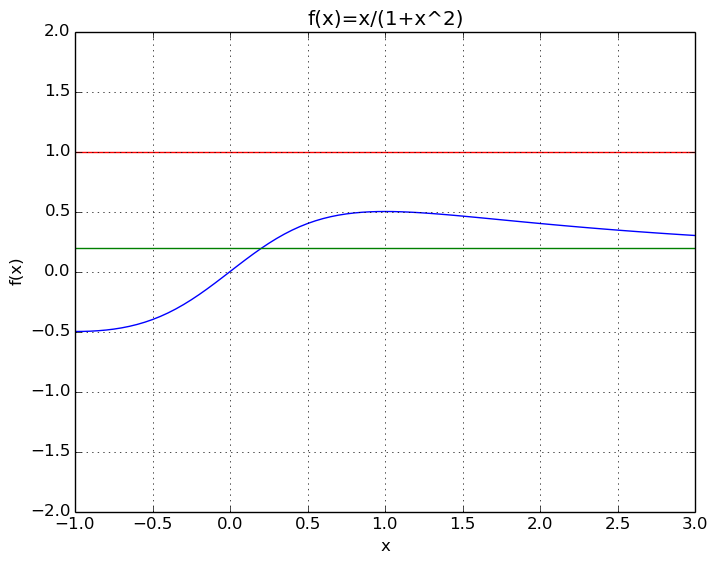

In [100]:
Pkg.add("PyPlot")
using PyPlot
v=[-1, 3, -2, 2]
x=[-4:0.05:4]
f=x./(1+x.^2)
#Limites del intervalo
inf=ones(161)*Y.inf
sup=ones(161)*Y.sup
plot(x,f,x,inf,x,sup)
axis(v)
title("f(x)=x/(1+x^2)")
xlabel("x")
ylabel("f(x)")
grid("on")

VEmos que el resultado del intervalo es **MUCHO** más grande que la imagen de la función valuada en el mismo intervalo. ¿Cuál es la moraleja? Al trabajar con aritmética de intervalos estamos exagerando de alguna manera los posibles resultados obtenidos. 

**[4]** Demuestra que $f(x)=(sin(x)−x^2+1)cos(x)$ no tiene raíces en $x=[0,1/2]$. Ilustra que el argumento es correcto gráficamente.

In [101]:
X1=Intervalo(0,1/2)
Y1=(sin(X1)-X1^2+1)*cos(X1)

Intervalo(6.58186921417779569054573585162870585918426513671875e-01 with 256 bits of precision,1.47942553860420300537725779577158391475677490234375e+00 with 256 bits of precision)

No existe algun cambio de signo en el intervalo resultante, ¿Es suficiente para determinar que no existe alguna raíz?